In [1]:
import pandas as pd
import seaborn as srn
import seaborn as sns
import statistics as sts
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
cet=pd.read_excel('Aval_cetam_f_v8.xlsx')
cet.shape

(175, 14)

In [3]:
#formato da matriz
previsores=cet.iloc[:,0:13].values
classe=cet.iloc[:,13].values

In [5]:
#transformar os atributos categoricos em atributos numericos, passando o indice de cada coluna categorica
#criacao de um objeto para cada atributo categorico
labelencoder1=LabelEncoder()
previsores[:,0]=labelencoder1.fit_transform(previsores[:,0])
labelencoder2=LabelEncoder()
previsores[:,1]=labelencoder2.fit_transform(previsores[:,1])
labelencoder3=LabelEncoder()
previsores[:,2]=labelencoder3.fit_transform(previsores[:,2])
labelencoder4=LabelEncoder()
previsores[:,3]=labelencoder4.fit_transform(previsores[:,3])
labelencoder5=LabelEncoder()
previsores[:,4]=labelencoder5.fit_transform(previsores[:,4])
labelencoder6=LabelEncoder()
previsores[:,5]=labelencoder6.fit_transform(previsores[:,5])
labelencoder7=LabelEncoder()
previsores[:,6]=labelencoder7.fit_transform(previsores[:,6])
labelencoder8=LabelEncoder()
previsores[:,7]=labelencoder8.fit_transform(previsores[:,7])
labelencoder9=LabelEncoder()
previsores[:,8]=labelencoder9.fit_transform(previsores[:,8])
labelencoder10=LabelEncoder()
previsores[:,9]=labelencoder10.fit_transform(previsores[:,9])
labelencoder11=LabelEncoder()
previsores[:,10]=labelencoder11.fit_transform(previsores[:,10])
labelencoder12=LabelEncoder()
previsores[:,11]=labelencoder12.fit_transform(previsores[:,11])
labelencoder13=LabelEncoder()
previsores[:,12]=labelencoder13.fit_transform(previsores[:,12])



In [6]:
#divisao da base de dados entre treinamento e teste (30% testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste= train_test_split(previsores, 
                                                                 classe, 
                                                                 test_size=0.3,
                                                                 random_state=0)


In [7]:
arvore= DecisionTreeClassifier()
arvore.fit(X_treinamento,y_treinamento)

DecisionTreeClassifier()

In [11]:
#obtencao das previsoes
previsoes=arvore.predict(X_teste)
previsoes

array(['NAO ', 'SIM', 'SIM', 'NAO ', 'NAO ', 'SIM', 'NAO ', 'NAO ',
       'NAO ', 'NAO ', 'NAO ', 'NAO ', 'NAO ', 'NAO ', 'NAO ', 'NAO ',
       'NAO ', 'NAO ', 'NAO ', 'NAO ', 'NAO ', 'NAO ', 'NAO ', 'NAO ',
       'NAO ', 'NAO ', 'SIM', 'NAO ', 'NAO ', 'NAO ', 'NAO ', 'NAO ',
       'NAO ', 'NAO ', 'NAO ', 'NAO ', 'NAO ', 'NAO ', 'NAO ', 'SIM',
       'NAO ', 'NAO ', 'NAO ', 'SIM', 'NAO ', 'NAO ', 'NAO ', 'NAO ',
       'NAO ', 'NAO ', 'NAO ', 'NAO ', 'NAO '], dtype=object)

In [12]:
#matriz de confusao
confusao=confusion_matrix(y_teste,previsoes)
confusao

array([[45,  4],
       [ 2,  2]], dtype=int64)

In [13]:
#TAXA DE ACURACIO DO MODELO PARA PREVISÃO DA EMPREGABILIDADE OU NAO DO ALUNO
taxa_acerto=accuracy_score(y_teste, previsoes)
taxa_acerto

0.8867924528301887

Text(0, 0.5, '')

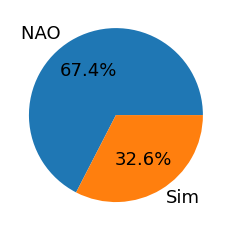

In [7]:
cet['Possui experiencia na area de formacao do curso?'].value_counts().plot.pie(fontsize=18,autopct='%1.1f%%',
                                                            figsize=(6,4)).set_ylabel('')

Text(0, 0.5, '')

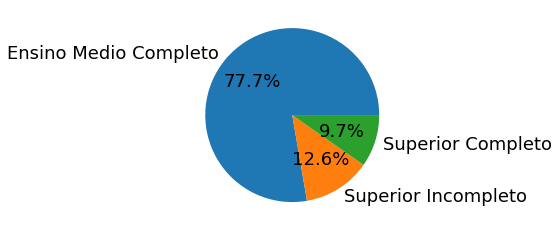

In [9]:
cet['Qual sua formacao regular?'].value_counts().plot.pie(fontsize=18,autopct='%1.1f%%',
                                                            figsize=(6,4)).set_ylabel('')

Text(0, 0.5, '')

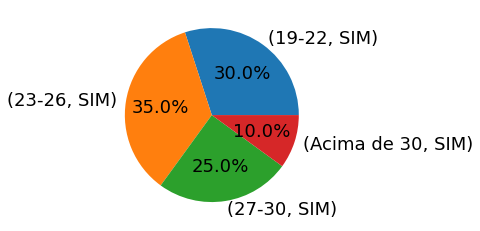

In [93]:
#INFLUENCIA DA IDADE NA EMPREGABILIDADE DOS ALUNOS
gnf1 = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
gnf1.groupby(u'Qual sua idade?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie(fontsize=18,autopct='%1.1f%%',
                                                            figsize=(6,4)).set_ylabel('')

Text(0, 0.5, '')

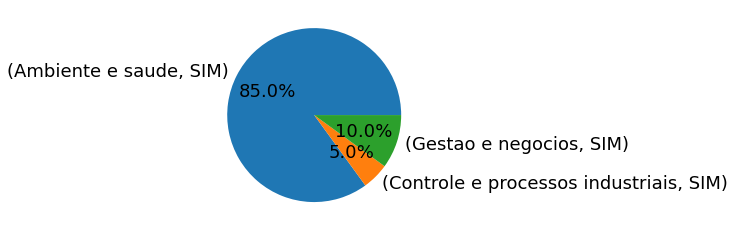

In [94]:
#INFLUENCIA DO EIXO TECNOLOGICO NA EMPREGABILIDADE DOS ALUNOS
gnf1 = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
gnf1.groupby(u'Qual o eixo tecnologico?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie(fontsize=18,autopct='%1.1f%%',
                                                            figsize=(6,4)).set_ylabel('')

Text(0, 0.5, '')

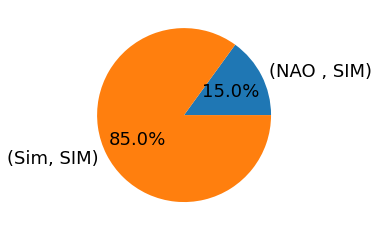

In [102]:
#INFLUENCIA DA EXPERIENCIA NA EMPREGABILIDADE DOS ALUNOS
gnf1 = cet[cet['Esta exercendo atividade remunerada na area de formacao do curso?']=='SIM']
gnf1.groupby(u'Possui experiencia na area de formacao do curso?')['Esta exercendo atividade remunerada na area de formacao do curso?'].value_counts().plot.pie(fontsize=18,autopct='%1.1f%%',
                                                            figsize=(6,4)).set_ylabel('')